In [102]:
import os
import re
import h5py
import numpy as np
import pandas as pd
import scipy.io

import matplotlib.pyplot as plt
import seaborn as sns

from tqdm import tqdm

import utils

datadir = '../datasets/NNN/'
fnames = utils.fnames(datadir)

In [ ]:
cols = ['session', 'monkey', 'unit_types', 'avg_psth', 'img_psth', 'avg_firing_rate', 'snr']
df = pd.DataFrame(columns=cols)

total_units = 0
for i, pair in tqdm(enumerate(fnames)):
    gus_fname = os.path.join(datadir, pair[0])
    proc_fname = os.path.join(datadir, pair[1])
    m = re.match(r'Processed_ses(\d+)_(\d{6})_M(\d+)_(\d+)\.mat', proc_fname.split('/')[-1])
    if not m:
        print(f"Could not parse {proc_fname}")
        continue
    try:
        gus_data = utils.load_mat(gus_fname)
        proc_data = scipy.io.loadmat(proc_fname)
        
        session_num = int(m.group(1))
        monkey = int(m.group(3))
        unit_types = proc_data['UnitType'][0]
        num_units = len(proc_data['UnitType'][0])

        snr = proc_data['snr'].T.squeeze(); assert snr.shape[0] == num_units
        img_psth = np.stack(gus_data['GoodUnitStrc']['response_matrix_img']); assert img_psth.shape[0] == num_units
        avg_psth = proc_data['mean_psth']; assert avg_psth.shape[0] == num_units
        avg_fr = proc_data['response_basic']; assert avg_fr.shape[0] == num_units
            
        total_units += num_units

        df.loc[len(df)] = {
            'session': session_num,
            'monkey': monkey,
            'unit_types': unit_types,
            'avg_psth': avg_psth,
            'img_psth': img_psth,
            'avg_firing_rate': avg_fr,
            'snr': snr
        }
    except AssertionError as e:
        print(f"Assertion failed for {proc_fname or gus_fname}: {e}")
        continue
    except Exception as e:
        print(f"Error processing {proc_fname or gus_fname}: {e}")
        continue

print(f'total units: {total_units}')

28it [04:53, 11.89s/it]

Assertion failed for ../datasets/NNN/Processed_ses29_240920_M3_3.mat: 


32it [05:47, 13.39s/it]

In [109]:
snr.shape, num_units

((716,), 716)

unit types: 456
psth: (456, 450)
avg firing rate to all images: (456, 1072)
number of single units: 30


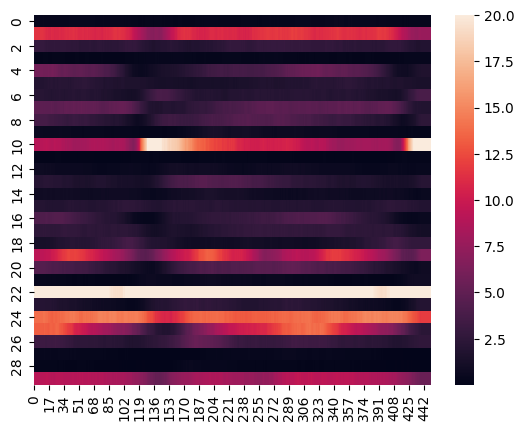

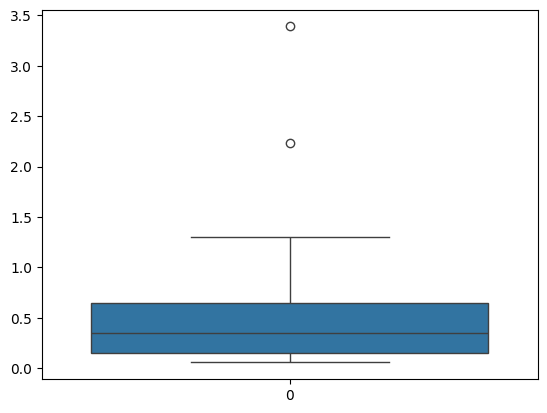

In [39]:
for i, pair in enumerate(fnames):
    if i>0:
        break
    gus_fname = os.path.join(datadir, pair[0])
    proc_fname = os.path.join(datadir, pair[1])
    
    gus_data = utils.load_mat(gus_fname)
    proc_data = scipy.io.loadmat(proc_fname)
    
    print('unit types:', len(proc_data['UnitType'][0]))
    print('psth:', proc_data['mean_psth'].shape)
    print('avg firing rate to all images:', proc_data['response_basic'].shape)
    
    mean_psth = proc_data['mean_psth']
    unit_type = proc_data['UnitType'][0]
    single_units = np.where(unit_type==1)
    snr = proc_data['snr'].T
    response = np.stack(gus_data['GoodUnitStrc']['response_matrix_img'])
    
    print(f'number of single units: {np.sum(unit_type==1)}')
    
    sns.heatmap(mean_psth[single_units], vmax=20)
    plt.show()
    
    sns.boxplot(snr[single_units])
    plt.show()

In [61]:
gus_data['GoodUnitStrc']['waveform'][20].shape

(61, 7)

In [20]:
print('unit types:', len(proc_data['UnitType'][0]))
print('avg response to all images:', proc_data['response_basic'].shape)
print('psth:', proc_data['mean_psth'].shape)

unit types: 496
avg response to all images: (496, 1072)
psth: (496, 450)


0.0 96.62934875488281 4.594778773461978 6.53839252232445


<Axes: >

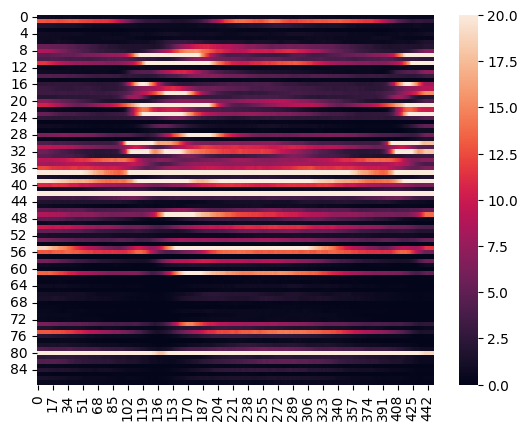

In [13]:
mean_psth = proc_data['mean_psth']
unit_type = proc_data['UnitType'][0]
single_units = np.where(unit_type==1)

print(np.min(mean_psth), np.max(mean_psth), np.mean(mean_psth), np.std(mean_psth))

sns.heatmap(mean_psth[single_units], vmax=20)

<Axes: >

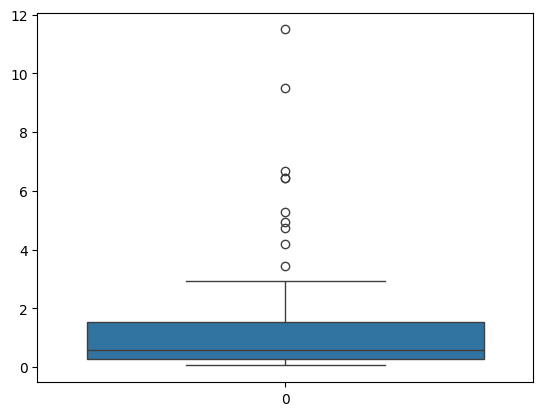

In [31]:
snr = proc_data['snr']
unit_type = proc_data['UnitType'][0]
single_units = np.where(unit_type==1)
sns.boxplot(snr.T[np.where(unit_type==1)])
# sns.boxplot(snr.T[np.where(unit_type==2)])